In [1]:
import requests 
from datetime import datetime 
import matplotlib.pyplot as plt 

In [64]:
global dataset_id_chosen, countriesandterritories, direction, time, geography 

dataset_id_chosen = 'trade'
countriesandterritories = 'US'
direction = 'IM' #can be IM or EX
sitc = '01'

time = '*' #leave unchanged 
geography = 'K02000001' #leave unchanged 

In [50]:
def latest_version():
    try:
        response = requests.get(f"https://api.beta.ons.gov.uk/v1/datasets/{dataset_id_chosen}")
        response.raise_for_status()
        dataset_info = response.json()
        global latest_version_href
        #Access the 'href', key in the 'latest_version' dictionary and assign it to a variable
        latest_version_href = dataset_info['links']['latest_version']['href']
        global latest_version_of_data
        
        #Access the 'id' key in the 'latest_version' dictionary and assign it to a variable
        #latest_version_of_data = dataset_info['links']['latest_version']['id']

    except requests.exceptions.RequestException as error:
        print("Error requesting data:", error)
    except ValueError as error:
        print("Error parsing response data:", error)

In [36]:
latest_version()

In [37]:
def buildhrefs():
    
    global href_list
    href_list = []
    
    latest_version()
    total_href = latest_version_href + '/observations?' + 'countriesandterritories=' + countriesandterritories + '&direction=' + direction  + '&time=' + time  + '&geography=' + geography  + '&standardindustrialtradeclassification=' + sitc
    href_list.append(total_href)
    
    return



In [38]:
buildhrefs()

In [57]:
def getdata():
    
    global source, sorted_datetimes, sorted_observations 
    
    
    buildhrefs()
    
    for href in href_list:
        
        try:
            response = requests.get(href)
            response.raise_for_status()
            dataset_unformated = response.json()
            
            source = href 
            
            time_list = []
            observation_list = []
            
            for observation in dataset_unformated['observations']:
                time = observation['dimensions']['Time']['id']
                value = observation['observation']
                
                time_list.append(time)
                
                observation_list.append(value)
                
            
        except requests.exceptions.RequestException as error:
            print("Error requesting data:", error)
        except ValueError as error:
            print("Error parsing response data:", error)
            
            
            
        datetime_objects = [datetime.strptime(time, '%b-%y') for time in time_list]
        #convert srting to datetime object 
        
        observation_list = [float(obs) for obs in observation_list]
            
        pairs = list(zip(datetime_objects, observation_list))

        sorted_pairs = sorted(pairs, key=lambda x: x[0])
            
        sorted_datetimes, sorted_observations = zip(*sorted_pairs)
                                    
            
        datetime_objects = [datetime.strptime(time, '%b-%y') for time in time_list]
        
                
        pairs = list(zip(datetime_objects, observation_list))
        sorted_pairs = sorted(pairs, key=lambda x: x[0])
        sorted_datetimes, sorted_observations = zip(*sorted_pairs)  

    
    return 
    

In [61]:
def chartformating():
    
    start_date = '01/2022'
    end_date = '12/2023'
    
    global charttitle, direction_label
    
    if direction == 'EX':
        direction_label = 'Exports (million £s)'
        charttitle = 'Exports of SITC' + f'{sitc}' + ' to ' + f'{countriesandterritories}'       
        
    if direction == 'IM':
        direction_label = 'Imports (million £s)'
        charttitle = 'Imports of SITC' + f'{sitc}' + ' from ' + f'{countriesandterritories}'   
    
    return 

In [41]:
def plotdata(): 
    
    chartformating()
    
    plt.plot(sorted_datetimes, sorted_observations)
    plt.title(charttitle)
    plt.ylabel(direction_label)
    plt.xlabel('Time')
    plt.show()
    
    print('Source: ' + source)
    
    return 

In [42]:
def output():
    
    getdata()
    plotdata()
    
    return 

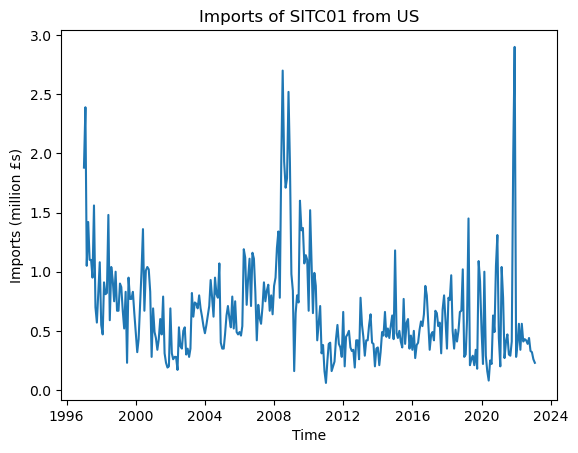

Source: https://api.beta.ons.gov.uk/v1/datasets/trade/editions/time-series/versions/31/observations?countriesandterritories=US&direction=IM&time=*&geography=K02000001&standardindustrialtradeclassification=01


In [65]:
output()